## Veri Madeciniği 13. hafta dersi

## NLP örnek: SMS mesajlarının spam / "spam değil" olarak sınıflandırılması

In [1]:
import pandas as pd

In [47]:
sms = pd.read_csv('https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/SMSSpamCollection.txt', sep='\t', names=['etiket','mesaj'])

In [3]:
sms.head() # ham: spam-değil: not-spam

,etiket,mesaj
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# EDA: Açıklayıcı Veri Analizi (Exploratory Data Analysis)

In [5]:
sms.describe()

,etiket,mesaj
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
sms.groupby('etiket').describe()

mesaj                                                               
       count unique                                                top freq
etiket                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

In [48]:
# feature engineering (özellik arama ve yenisi oluşturma -gerekirse-)
# mesaj karakter sayısı işe yarar yeni bir özellik olabilir.
sms['kacKarakter'] = sms["mesaj"].apply(len)

In [8]:
sms.head()

,etiket,mesaj,kacKarakter
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
# Veri görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

<AxesSubplot:ylabel='Frequency'>

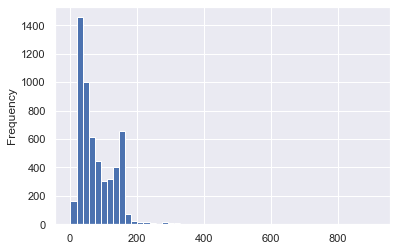

In [21]:
sms['kacKarakter'].plot(bins=50, kind='hist')

In [13]:
sms['kacKarakter'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: kacKarakter, dtype: float64

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

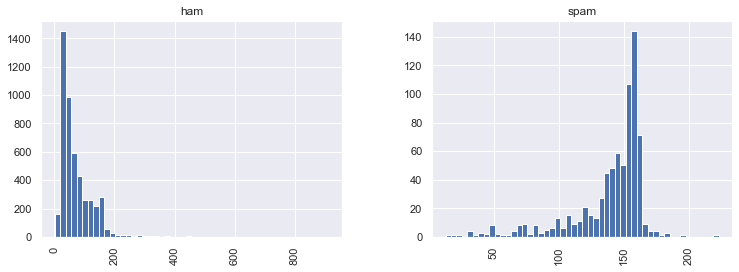

In [22]:
# Spam ve Spam olmayan olan mesajların ayrı ayrı histogram grafiği
sms.hist(column='kacKarakter', by='etiket', bins=50, figsize=(12,4))

In [17]:
sms[sms['etiket']=='spam']['kacKarakter'].describe()

count    747.000000
mean     138.670683
std       28.873603
min       13.000000
25%      133.000000
50%      149.000000
75%      157.000000
max      223.000000
Name: kacKarakter, dtype: float64

In [18]:
sms[sms['etiket']=='ham']['kacKarakter'].describe()

count    4825.000000
mean       71.482487
std        58.440652
min         2.000000
25%        33.000000
50%        52.000000
75%        93.000000
max       910.000000
Name: kacKarakter, dtype: float64

In [23]:
# metin ön-işleme

In [24]:
import string

In [26]:
cumle = "selam, kaç tane? bilmiyorum. nasıl yani!"
noktalamaIsaretleri = [char for char in cumle if char in string.punctuation]
print(noktalamaIsaretleri)


[',', '?', '.', '!']


In [28]:
from nltk.corpus import stopwords

In [33]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [38]:
def metin_isle(mesaj):
    # noktalama işaretleri gitsin
    # stopwords gitsin
    kelimeler = [char for char in mesaj if char not in string.punctuation]
    kelimeler = ''.join(kelimeler)
    return [kelime for kelime in kelimeler.split() if kelime.lower() not in stopwords.words('english')]

In [39]:
metin_isle("I am getting hungry. you?")

['getting', 'hungry']

In [41]:
# Orjinal data frame
sms.head()

,etiket,mesaj,kacKarakter
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [42]:
# mesaj kolonunda noktalama işaretleri ve stopwords gitsin
sms['mesaj'].head(5).apply(metin_isle)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: mesaj, dtype: object

In [45]:
# Vectorization
# 1. Bir mesajda her kelimenin kaç defa kullanıldığını say (kelime frekansı)
# 2. Kullanım sayılarının ağırlığını belirle (Yüksek frekans -> yüksek ağırlık, düşük frekans -> düşük ağırlık)
# 3. Vektör uzunluklarını birim uzunluğa normalize et (orjinal metin uzunluğundan çıkarmak için)
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
bow_transormer = CountVectorizer(analyzer=metin_isle).fit(sms['mesaj'])

In [51]:
print(len(bow_transormer.vocabulary_))

11425


In [52]:
mesajOrnek = sms['mesaj'][4]
print(mesajOrnek)

Nah I don't think he goes to usf, he lives around here though


In [55]:
# Bag-of-Words: bow
bowOrnek = bow_transormer.transform([mesajOrnek])
print(bowOrnek)

  (0, 2948)	1
  (0, 4777)	1
  (0, 6123)	1
  (0, 6877)	1
  (0, 7842)	1
  (0, 10433)	1
  (0, 10450)	1
  (0, 10799)	1


In [56]:
bow_transormer.get_feature_names()[4777]

'around'

In [57]:
bow_transormer.get_feature_names()[10799]

'usf'

In [58]:
# transform
mesajlar_bow = bow_transormer.transform(sms["mesaj"])

In [59]:
print('Matris boyutu: ', mesajlar_bow.shape)

Matris boyutu:  (5572, 11425)


In [60]:
print('Sıfır olmayan matris elemanı sayısı: ',mesajlar_bow.nnz)

Sıfır olmayan matris elemenı sayısı:  50548


In [ ]:
# 1. adım (kelime sayma) tamamlandı.
# Sonraki 2. ve 3. adımları için TfidfTransformer kullanılacak. 
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

In [62]:
from sklearn.feature_extraction.text import TfidfTransformer

In [63]:
tfidf_transformer = TfidfTransformer().fit(mesajlar_bow)

In [64]:
tfidfOrnek = tfidf_transformer.transform(bowOrnek)
print(tfidfOrnek)

  (0, 10799)	0.4019015462543087
  (0, 10450)	0.35407004444444734
  (0, 10433)	0.27043580251222216
  (0, 7842)	0.4457437273623316
  (0, 6877)	0.35407004444444734
  (0, 6123)	0.24090226292109554
  (0, 4777)	0.3104226271508041
  (0, 2948)	0.4019015462543087


In [66]:
# Kelimelerin IDF (Inverse Document Frequency) değerleri 
tfidf_transformer.idf_[bow_transormer.vocabulary_['university']]

8.527076498901426

In [67]:
tfidf_transformer.idf_[bow_transormer.vocabulary_['cup']]

8.016250875135436

In [69]:
mesaj_tfidf = tfidf_transformer.transform(mesajlar_bow)

In [68]:
# EDA tamamlandı
# Sonraki aşama model eğitimi

In [70]:
# Naive Bayes sınıflandırıcını kullanacağız.
from sklearn.naive_bayes import MultinomialNB
spam_model = MultinomialNB().fit(mesaj_tfidf, sms['etiket'])

In [72]:
print('tahmin edilen:', spam_model.predict(tfidfOrnek)[0])
print('Gerçek:', sms.etiket[4])

tahmin edilen: ham
Gerçek: ham


In [73]:
# Modelin değerlendirilmesi
butun_tahminler = spam_model.predict(mesaj_tfidf)

In [74]:
from sklearn.metrics import classification_report
print(classification_report(sms['etiket'], butun_tahminler))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [75]:
# Eğitim - Test setlerinin ayrılması
from sklearn.model_selection import train_test_split

sms_train, sms_test, label_train, label_test = train_test_split(sms['mesaj'], sms['etiket'], test_size=0.2)

In [77]:
# Pipeline
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
from sklearn.pipeline import Pipeline

In [78]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=metin_isle)), # 1. adım, bag-of-word oluştur
    ('tfidf', TfidfTransformer()), # bag-of-words -> TF-IDF skorları
    ('classifier', MultinomialNB()), # train (eğitim)
])

In [79]:
pipeline.fit(sms_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function metin_isle at 0x000001F0585EC310>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [80]:
tahminler = pipeline.predict(sms_test)

In [82]:
print(classification_report(tahminler, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1009
        spam       0.70      1.00      0.82       106

    accuracy                           0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115

